<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/The%20Basics/probability_and_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [1]:
!pip install mxnet

Importing Libraries

In [0]:
import mxnet as mx
from mxnet import nd
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

Basic Probability Theory

In [3]:
probabilities = nd.ones(6) / 6
nd.random.multinomial(probabilities)


[3]
<NDArray 1 @cpu(0)>

In [4]:
print(nd.random.multinomial(probabilities, shape=(10)))
print(nd.random.multinomial(probabilities, shape=(5,10)))


[3 4 5 3 5 3 5 2 3 3]
<NDArray 10 @cpu(0)>

[[2 2 1 5 0 5 1 2 2 4]
 [4 3 2 3 2 5 5 0 2 0]
 [3 0 2 4 5 4 0 5 5 5]
 [2 4 4 2 3 4 4 0 4 3]
 [3 0 3 5 4 3 0 2 2 1]]
<NDArray 5x10 @cpu(0)>


In [5]:
rolls = nd.random.multinomial(probabilities, shape=(1000))
# counts is used to store the cumulative count of numbers after each roll
counts = nd.zeros((6,1000))
# totals is the count of numbers after the sample ended
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

# just checking if we are getting correct counts
print(counts[:, 999] == totals)


[1. 1. 1. 1. 1. 1.]
<NDArray 6 @cpu(0)>


In [6]:
print(totals / 1000)
print(counts)


[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>

[[  0.   0.   0. ... 165. 166. 167.]
 [  1.   1.   1. ... 168. 168. 168.]
 [  0.   0.   0. ... 175. 175. 175.]
 [  0.   0.   0. ... 159. 159. 159.]
 [  0.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 173.]]
<NDArray 6x1000 @cpu(0)>


In [7]:
# finding the probabilities of numbers on dice after each roll
# normalize each jth column of the counts vector by the number of tosses to give the current estimated probabilities at that time.

# generating sequence from 1 to 1000
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:, 0])
print(estimates[:, 1])
print(estimates[:, 100])
print(estimates[:, 999])


[0. 1. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.  0.  0.5 0. ]
<NDArray 6 @cpu(0)>

[0.1980198  0.15841584 0.17821783 0.18811882 0.12871288 0.14851485]
<NDArray 6 @cpu(0)>

[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>


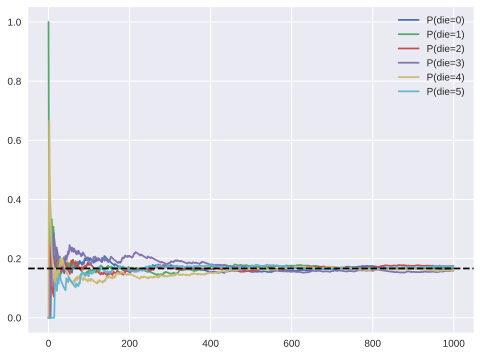

In [8]:
# This is interesting
display.set_matplotlib_formats('svg')

plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

Exercises

max(Pr(A), Pr(B)) <= Pr(A ∪ B) <= Pr(A) + Pr(B)

Pr(A) + Pr(B) - 1 <= Pr(A ∩ B) <= min(Pr(A), Pr(B))

A stochastic process has the Markov property if the conditional probability distribution of future states of the process depends only upon the present state, not on the sequence of events that preceded it.

Pr(Xn+1 = x | X1 = x1, X2 = x2, ....., Xn = xn) = Pr(Xn+1 = x | Xn = xn)